# Computer Vision - P3


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 10th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background substraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background substraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)


Note: One of the applications of the backgroun substraction methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Today, most of videoconference tools allow to put a virtual background. Thus, they need to extract the person (the foreground) and to put it on the new virtual background.


## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

Hint: In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html).

Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [1]:
%matplotlib inline

<IPython.core.display.Javascript object>


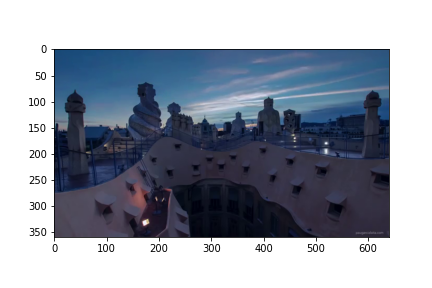

In [2]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder


%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [2]:
def show_video():
    
    """ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder"""

    %matplotlib nbagg 
        #Changing the pluggin is necessary always when visualizing a video!

    fig = plt.figure()  # Create figure
    im = plt.imshow(ic[0], animated=True) #Visualize the first image

    index = 0
    
    def updatefig1(i):   #Updating the frame visualization
        im.set_array(ic[i]) #Changing the content of the canvas
        index = i
        return im, #to return a tuple!
        
    
    plt.show()
    ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
    plt.show()

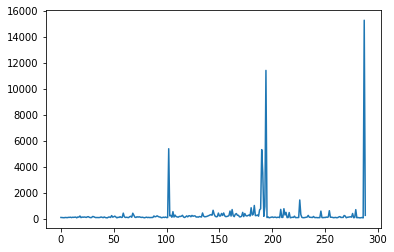

[[102]
 [190]
 [194]
 [287]]
290
[102, 190]


<IPython.core.display.Javascript object>


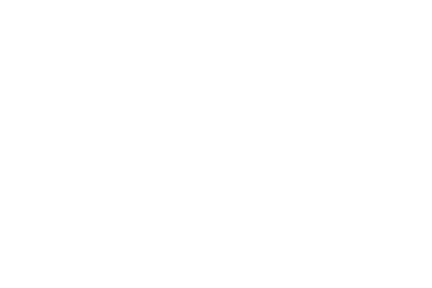

<IPython.core.display.Javascript object>


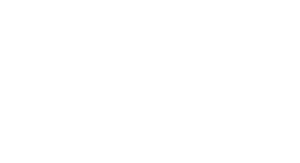

In [2]:
# Your soluction here
import skimage
from skimage import img_as_float
from skimage.exposure import histogram
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('images/Barcelona-sequence/*.png')

def compute_hist(im, im_prev, hist_im_prev=None):

    [hist_r, bins_r]=histogram((img_as_float(im)[:,:,0]),64)
    [hist_g, bins_g]=histogram((img_as_float(im)[:,:,1]),64)
    [hist_b, bins_b]=histogram((img_as_float(im)[:,:,2]),64)
    hist_im = np.array(hist_r+hist_g+hist_b)
        
    if hist_im_prev is None:
        [hist_r, bins_r]=histogram((img_as_float(im_prev)[:,:,0]),64)
        [hist_g, bins_g]=histogram((img_as_float(im_prev)[:,:,1]),64)
        [hist_b, bins_b]=histogram((img_as_float(im_prev)[:,:,2]),64)
        hist_im_prev = np.array(hist_r+hist_g+hist_b)

    hist_diff = np.mean(np.abs(hist_im_prev - hist_im))
        
    return hist_diff, hist_im_prev


# initialize the data arrays 
xdata = []
ydata = []
prev_hist = None

%matplotlib inline

for t in range(len(ic)-1):
    # update the data plot
    y, prev_hist = compute_hist(ic[t+1], ic[t])#, hist_im_prev=prev_hist)
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis
    
fig, ax = plt.subplots(1)
plt.plot(xdata, ydata)
plt.show()
threshold = 4000 #we choose the threshold based in the histogram of differences
y_axis = np.array(ydata)
mask = np.argwhere(y_axis > threshold)
print(mask)

mask_final = []
for i in mask:
    for k in range(i[0]-5, i[0]+5):
        condition_append  =True
        if k in mask_final:
            condition_append = False
            break
    if condition_append:
        mask_final.append(i[0])
print(len(ic))
for i in mask_final:
    if i>len(ic)-10: mask_final.remove(i)
print(mask_final)

"""ic = io.ImageCollection('images/Barcelona-sequence/*.png')"""
        # Reading a sequence of images from a folder
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

index = 0

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    index = i
    return im, #to return a tuple!


plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=mask_final[0], repeat= True)
plt.show()

Additionally, create an interactive plot executing the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 

<IPython.core.display.Javascript object>


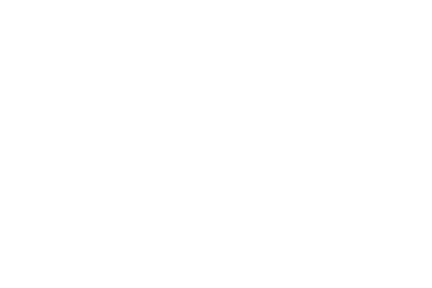

<IPython.core.display.Javascript object>


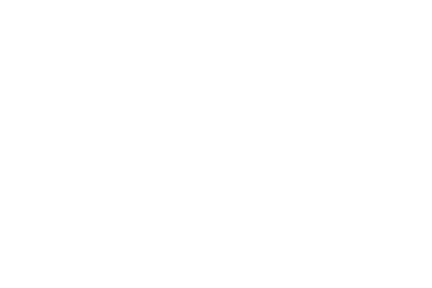

In [5]:
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

<IPython.core.display.Javascript object>


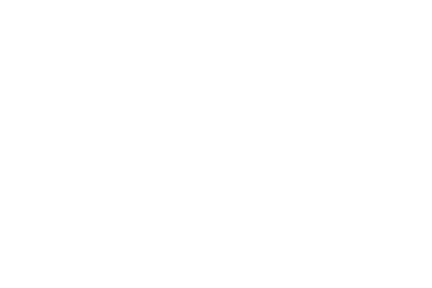

In [6]:
# Your soluction here
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y, prevhist = compute_hist(ic[cnt+1], ic[cnt]) 
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 30000)
ax2.set_xlim(0, 10)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])

    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()

    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


**Hint:**
Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize the initial and final frames.


In [4]:
def visualize1b(im_1, im_2):
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(1,2,1)
    plt.imshow(im_1)
    plt.xticks([])
    plt.yticks([])

    fig.add_subplot(1,2,2)
    plt.imshow(im_2)
    plt.xticks([])
    plt.yticks([])
    plt.show()

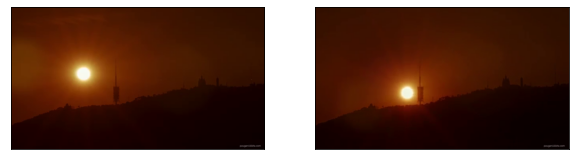

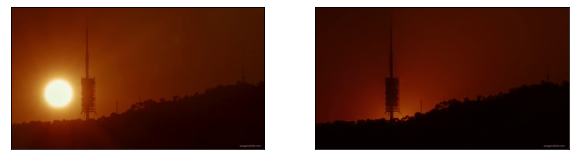

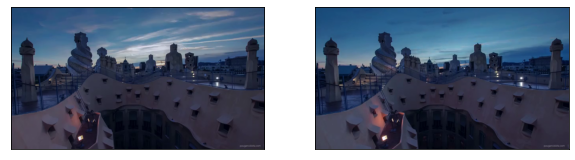

[102, 194, 287]


In [57]:
# Your soluction here

def segmentation(imgs, threshold):
    xdata = []
    ydata = []
    prev_hist = None
    #threshold=5350
    %matplotlib inline

    changes = []

    first_image = imgs[0]
    for t in range(len(imgs)-1):
        # update the data plot
        y, prev_hist = compute_hist(imgs[t+1], imgs[t])#, hist_im_prev=prev_hist)
        xdata.append(t) # time = x axis
        ydata.append(y) # y axis

        if y>threshold:
            changes.append(t)
            last_image = imgs[t-1]
            visualize1b(first_image, last_image)
            first_image = imgs[t+1]

    print(changes)

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder
segmentation(ic, 5350)

c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

d) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

a) Visualize the following images for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

102
(360, 640, 3)


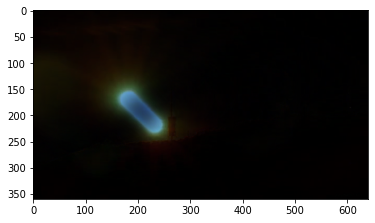

In [18]:
# Your soluction here
images = ic[:changes[0]]#ic[shots[0][0]:shots[0][1]]
print(shots[0])
background = np.mean(img_as_float(images), axis=0)
foreground = np.max(img_as_float(images)-background, axis=0)
print(background.shape)
plt.imshow(foreground)

b) Comment your implementation including details. 

c) Answer the following questions:
- What happens if the shots are not correctly extracted? 
- What happens if you find too many shots in the video? 
- What do the static background images represent? 
- In which situations does the algorithm work and in which it does not? 
- What happens if you substract the background image from the original one?
- Do you see any additional application for this algorithm?

d) **[OPTIONAL]**
- Apply the algorithm to some other static video that you found.

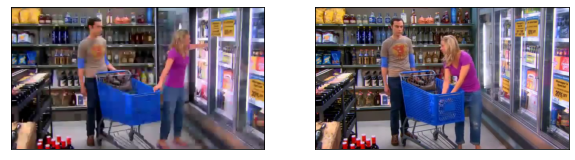

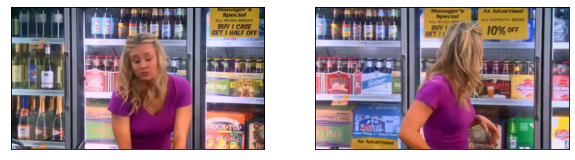

[103, 183]


In [58]:
# Your soluction here
img_bigbangtheory = io.ImageCollection('images/bigbangcollection/*.png')
         # Reading a sequence of images from a folder
segmentation(img_bigbangtheory, 1800)

## 3.3 Segmentation of images

Apply different clustering methods for image segmentation on the RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

a) Read 'loro.png' image from the folder 'images' and segment it using Felzenszwalbs's method. 


In [85]:
def show_segm(image_F, title):
    plt.imshow(image_F)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()

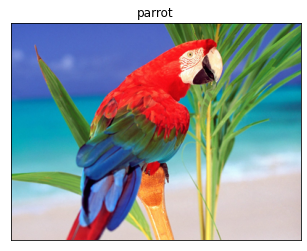

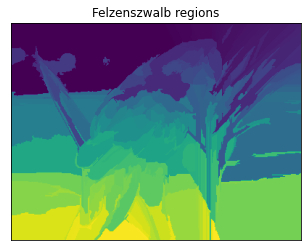

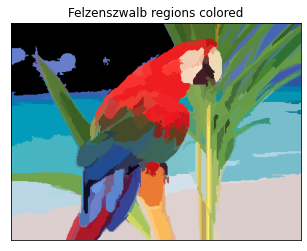

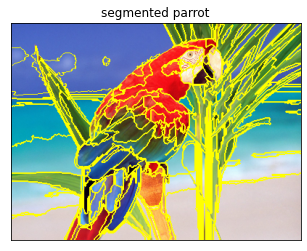

In [98]:
# Your soluction here
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.color import label2rgb

parrot = io.imread("images/loro.png")
show_segm(parrot, 'parrot')

parrot_float = img_as_float(parrot)
parrot_felz = felzenszwalb(parrot_float, scale=100, sigma=0.5, min_size=50)#(parrot, scale=3.0, sigma=7, min_size=5)
show_segm(parrot_felz, 'Felzenszwalb regions')

image_felzenszwalb_colored = label2rgb(parrot_felz, parrot_float, kind='avg', bg_label=0)
show_segm(image_felzenszwalb_colored, 'Felzenszwalb regions colored')

plt.imshow(mark_boundaries(parrot, parrot_Felz))
plt.xticks([])
plt.yticks([])
plt.title('segmented parrot')
plt.show()


b) Test different parameters in order to obtain a good image segmentation. 
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?


c) Comment what algorithm is the method based in up to 3 lines most.

d) Segment the same image using SLIC algorithm. 

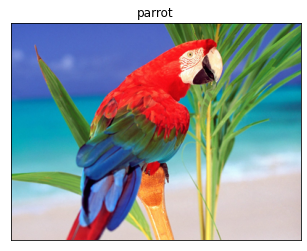

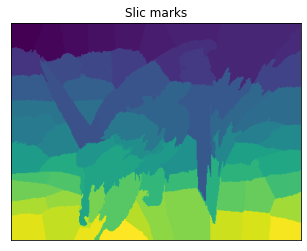

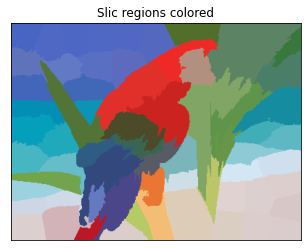

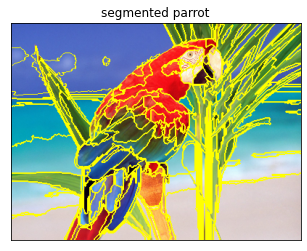

In [100]:
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb

parrot = io.imread("images/loro.png")
show_segm(parrot, 'parrot')

parrot_float = img_as_float(parrot)
parrot_slic = slic(parrot_float, n_segments=100, compactness=10, start_label=1)
show_segm(parrot_slic, 'Slic marks')

image_slic_colored = label2rgb(parrot_slic, parrot_float, kind='avg', bg_label=0)
show_segm(image_slic_colored, 'Slic regions colored')

plt.imshow(mark_boundaries(parrot, parrot_Felz))
plt.xticks([])
plt.yticks([])
plt.title('segmented parrot')
plt.show()

e) Test different parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

f) Segment the same image using the Quickshift algorithm. 

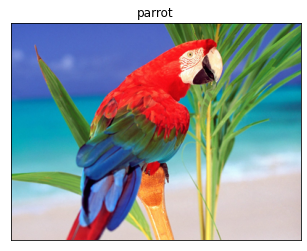

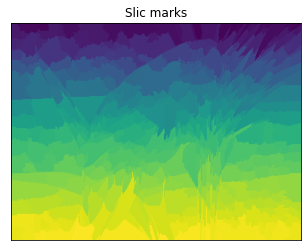

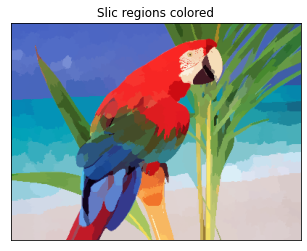

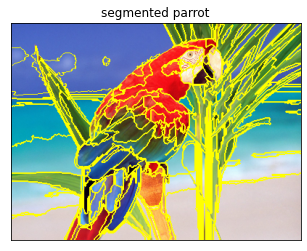

In [101]:
from skimage.segmentation import quickshift, mark_boundaries
from skimage.color import label2rgb

parrot = io.imread("images/loro.png")
show_segm(parrot, 'parrot')

parrot_float = img_as_float(parrot)
parrot_quick = quickshift(parrot_float, kernel_size=3, max_dist=6, ratio=0.5)
show_segm(parrot_quick, 'Slic marks')

image_quick_colored = label2rgb(parrot_quick, parrot_float, kind='avg', bg_label=0)
show_segm(image_quick_colored, 'Slic regions colored')

plt.imshow(mark_boundaries(parrot, parrot_Felz))
plt.xticks([])
plt.yticks([])
plt.title('segmented parrot')
plt.show()

g) Test different parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

h) Comment what algorithm is the method based in up to 3 lines.

i) Plot the original image and the results of both algorithms in a 1x3 subplot. 



j) Calculate also the number of segments obtained on the image by each of the algorithms. 

k) Comment the differences between each method as well as their advantages and disadvantages.